# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [23]:
# Dependencies and Setup
!pip install citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [32]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities=[]

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [35]:
# Set the API base URL
url ='http://api.openweathermap.org/data/2.5/weather?lat={LATITUDE}&lon={LONGITUDE}&appid={b5c6fae151cb9f472e9fd8fe9db8af7f)'
base_url = "http://api.openweathermap.org/data/2.5/weather"
api_key = "b5c6fae151cb9f472e9fd8fe9db8af7f"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}?q={city.replace(' ', '+')}&appid={api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san antonio de pale
Processing Record 2 of Set 1 | thanh hoa
Processing Record 3 of Set 1 | papatowai
Processing Record 4 of Set 1 | qaqortoq
Processing Record 5 of Set 1 | wad rawah
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | sarreguemines
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | olonkinbyen
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | sao gabriel da cachoeira
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | kununurra
Processing Record 15 of Set 1 | kulia village
City not found. Skipping...
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | sicuani
Processing Record 18 of Set 1 | pushkinskiye gory
Processing Record 19 of Set 1 | polyarnyy
Processing Record 20 of Set 1 | island harb

Processing Record 40 of Set 4 | port elizabeth
Processing Record 41 of Set 4 | guerrero negro
Processing Record 42 of Set 4 | chonchi
Processing Record 43 of Set 4 | calhoun
Processing Record 44 of Set 4 | kayangel
Processing Record 45 of Set 4 | tiksi
Processing Record 46 of Set 4 | chabahar
Processing Record 47 of Set 4 | hammerfest
Processing Record 48 of Set 4 | sosnogorsk
Processing Record 49 of Set 4 | thinadhoo
Processing Record 0 of Set 5 | vadso
Processing Record 1 of Set 5 | salvador
Processing Record 2 of Set 5 | naze
Processing Record 3 of Set 5 | baruun-urt
Processing Record 4 of Set 5 | yantarnyy
Processing Record 5 of Set 5 | fort bragg
Processing Record 6 of Set 5 | i-n-salah
Processing Record 7 of Set 5 | kirensk
Processing Record 8 of Set 5 | alofi
Processing Record 9 of Set 5 | yamasa
Processing Record 10 of Set 5 | caleta de carquin
Processing Record 11 of Set 5 | nabire
Processing Record 12 of Set 5 | vilhena
Processing Record 13 of Set 5 | bayganin
Processing Reco

Processing Record 33 of Set 8 | morehead city
Processing Record 34 of Set 8 | papao
Processing Record 35 of Set 8 | pyay
Processing Record 36 of Set 8 | muromtsevo
Processing Record 37 of Set 8 | parola
Processing Record 38 of Set 8 | makokou
Processing Record 39 of Set 8 | praia da vitoria
Processing Record 40 of Set 8 | maragogi
Processing Record 41 of Set 8 | antalaha
Processing Record 42 of Set 8 | kutum
Processing Record 43 of Set 8 | priargunsk
Processing Record 44 of Set 8 | alice springs
Processing Record 45 of Set 8 | concepcion de la sierra
Processing Record 46 of Set 8 | christchurch
Processing Record 47 of Set 8 | shache
Processing Record 48 of Set 8 | coronel dorrego
Processing Record 49 of Set 8 | vredefort
Processing Record 0 of Set 9 | tarrafal
Processing Record 1 of Set 9 | ma'ili
Processing Record 2 of Set 9 | galle
Processing Record 3 of Set 9 | cuyo
Processing Record 4 of Set 9 | ulety
Processing Record 5 of Set 9 | cozumel
Processing Record 6 of Set 9 | happy valle

Processing Record 24 of Set 12 | pathein
Processing Record 25 of Set 12 | niles
Processing Record 26 of Set 12 | chakia
Processing Record 27 of Set 12 | saint-joseph
Processing Record 28 of Set 12 | san julian
Processing Record 29 of Set 12 | pangoa
Processing Record 30 of Set 12 | ar ruways
Processing Record 31 of Set 12 | sayat
Processing Record 32 of Set 12 | jianshui
Processing Record 33 of Set 12 | boa vista
Processing Record 34 of Set 12 | vingt cinq
City not found. Skipping...
Processing Record 35 of Set 12 | kinzan
Processing Record 36 of Set 12 | hoa binh
-----------------------------
Data Retrieval Complete      
-----------------------------


In [36]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [37]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,san antonio de pale,-1.4014,5.6325,295.92,83,100,5.85,GQ,1690662514
1,thanh hoa,19.8000,105.7667,299.47,93,100,1.53,VN,1690662514
2,papatowai,-46.5619,169.4708,280.79,81,100,1.74,NZ,1690662514
3,qaqortoq,60.7167,-46.0333,281.29,74,31,1.30,GL,1690662514
4,wad rawah,15.1603,33.1397,302.41,53,100,7.69,SD,1690662515


In [38]:
# Export the City_Data into a csv
directory = r"C:\Users\kevin\Documents\Stater_Code"
if not os.path.exists(directory):
    os.makedirs(directory)
city_data_df.to_csv(r"C:\Users\kevin\Documents\Stater_Code\weather13.csv", index_label="City_ID")

In [40]:
# Read saved data
city_data_df = pd.read_csv(r"C:\Users\kevin\Documents\Stater_Code\weather13.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san antonio de pale,-1.4014,5.6325,295.92,83,100,5.85,GQ,1690662514
1,thanh hoa,19.8000,105.7667,299.47,93,100,1.53,VN,1690662514
2,papatowai,-46.5619,169.4708,280.79,81,100,1.74,NZ,1690662514
3,qaqortoq,60.7167,-46.0333,281.29,74,31,1.30,GL,1690662514
4,wad rawah,15.1603,33.1397,302.41,53,100,7.69,SD,1690662515


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

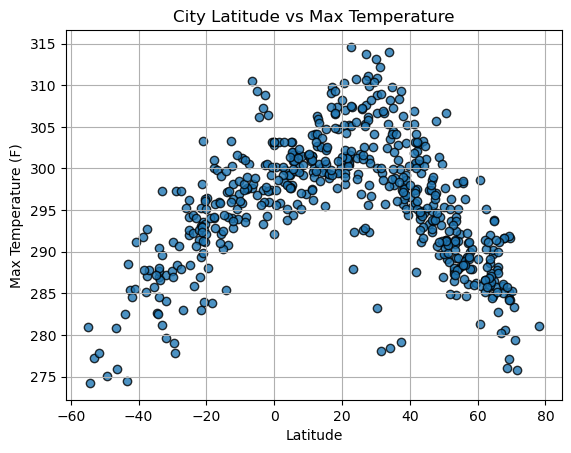

In [42]:
# Build scatter plot for latitude vs. temperature
# plt.scatter(df['Lat'], df['Max Temp'], edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')
if not os.path.exists('output_data'):
    os.makedirs('output_data')
plt.savefig("Fig1.png")
# Incorporate the other graph properties
plt.title('City Latitude vs Max Temperature')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig("output_data/Fig1.png")
plt.show()


#### Latitude Vs. Humidity

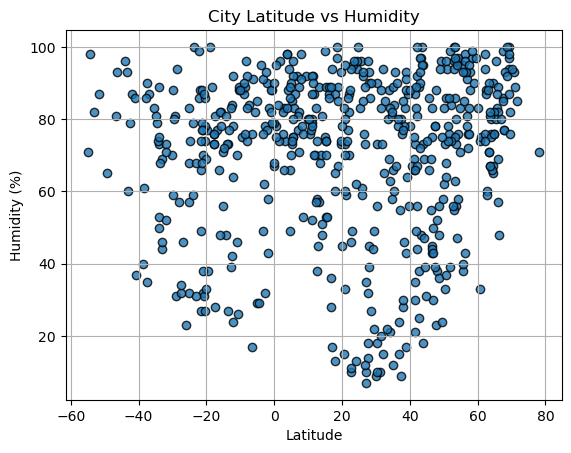

In [45]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')
plt.title('City Latitude vs Humidity')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

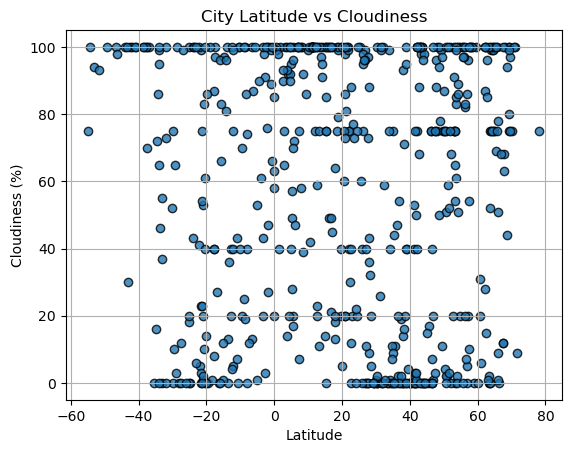

In [44]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')


# Incorporate the other graph properties
plt.title('City Latitude vs Cloudiness')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

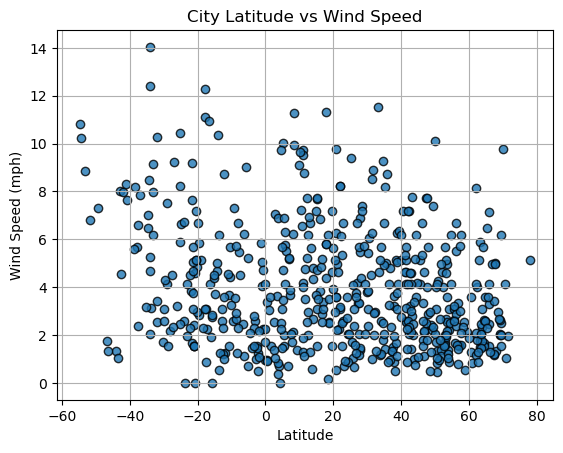

In [46]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='black', linewidths=1, marker='o', alpha=0.8, label='Cities')

plt.title('City Latitude vs Wind Speed')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [55]:
# Define a function to create Linear Regression plots
def plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,ifig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,lblpos,fontsize=15,color="red")
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.savefig(f"output_data/fig{ifig}.png")
    plt.show()

In [52]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,thanh hoa,19.8000,105.7667,299.47,93,100,1.53,VN,1690662514
3,qaqortoq,60.7167,-46.0333,281.29,74,31,1.30,GL,1690662514
4,wad rawah,15.1603,33.1397,302.41,53,100,7.69,SD,1690662515
5,sarreguemines,49.0833,7.3333,293.16,96,99,2.23,FR,1690662515
8,olonkinbyen,70.9221,-8.7187,279.37,89,100,1.05,SJ,1690662515


In [53]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,san antonio de pale,-1.4014,5.6325,295.92,83,100,5.85,GQ,1690662514
2,papatowai,-46.5619,169.4708,280.79,81,100,1.74,NZ,1690662514
6,bredasdorp,-34.5322,20.0403,282.66,79,72,6.48,ZA,1690662515
7,ushuaia,-54.8000,-68.3000,280.96,71,75,10.80,AR,1690662515
9,blackmans bay,-43.0167,147.3167,288.56,60,30,8.00,AU,1690662516


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.662151401812095


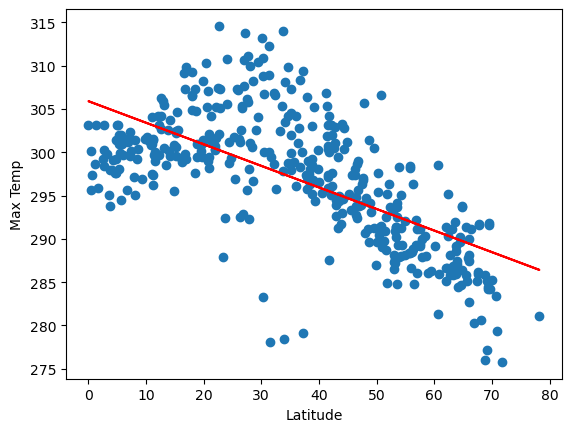

In [57]:
# Linear regression on Northern Hemisphere
xdata = northern_hemi_df['Lat']
ydata = northern_hemi_df['Max Temp']
xlbl = "Latitude"
ylbl = "Max Temp"
lblpos = (0,25)
ifig = 5

plotLinearRegression(xdata, ydata, xlbl, ylbl, lblpos, ifig)

The r-squared is: 0.7914473115892832


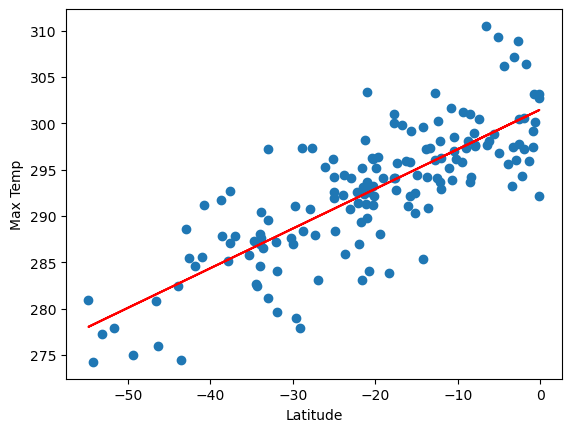

In [58]:
# Linear regression on Southern Hemisphere
xdata = southern_hemi_df['Lat']
ydata = southern_hemi_df['Max Temp']
xlbl = "Latitude"
ylbl = "Max Temp"
lblpos = (-55,90)
ifig = 6

plotLinearRegression(xdata, ydata, xlbl, ylbl, lblpos, ifig)

**Discussion about the linear relationship:** Based on the data shown on the graph you can conclude that the lower the latitude the higher the max temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.06665806313393606


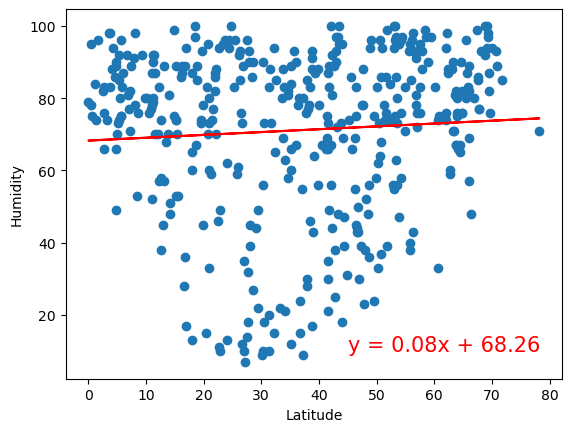

In [60]:
# Northern Hemisphere
xdata = northern_hemi_df['Lat']
ydata = northern_hemi_df['Humidity']
xlbl = "Latitude"
ylbl = "Humidity"
lblpos = (45, 10)
ifig = 7

plotLinearRegression(xdata, ydata, xlbl, ylbl, lblpos, ifig)

The r-squared is: -0.006111290500515079


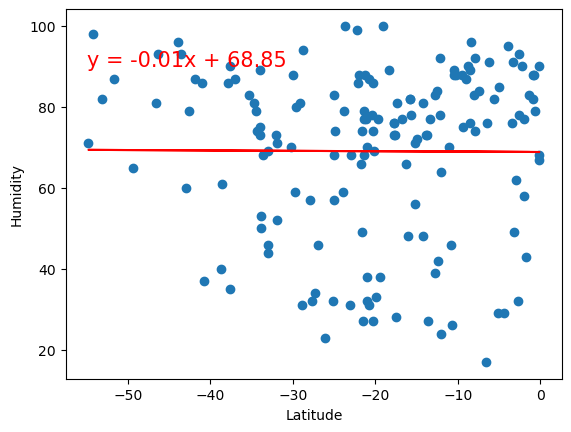

In [61]:
# Southern Hemisphere
xdata = southern_hemi_df['Lat']
ydata = southern_hemi_df["Humidity"]
xlbl = "Latitude"
ylbl = "Humidity"
lblpos = (-55,90)
ifig = 8

plotLinearRegression(xdata, ydata, xlbl, ylbl, lblpos, ifig)

**Discussion about the linear relationship:** Given that the slope is -.01 we can conclude that there is a negative correlation betwerrn latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: -0.08867623405663944


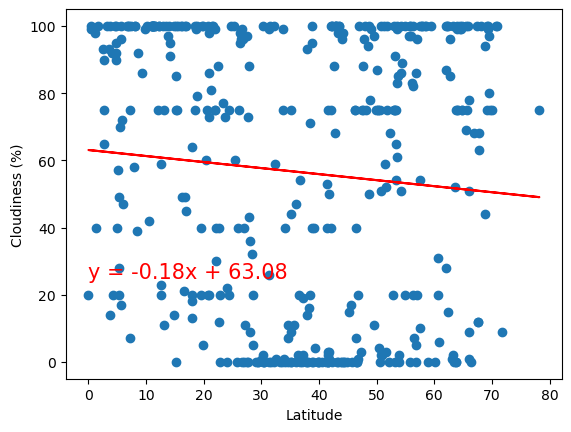

In [62]:
# Northern Hemisphere
xdata = northern_hemi_df['Lat']
ydata = northern_hemi_df['Cloudiness']
xlbl = 'Latitude'
ylbl = 'Cloudiness (%)'
lblpos = (0,25)
plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,9) 

The r-squared is: -0.11927903868478491


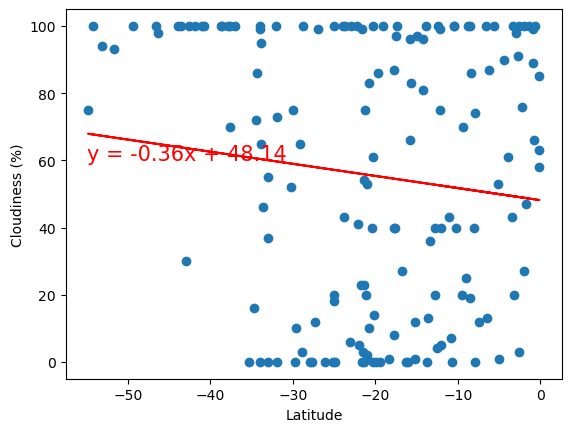

In [63]:
# Southern Hemisphere
xdata = southern_hemi_df['Lat']
ydata = southern_hemi_df['Cloudiness']
xlbl = 'Latitude'
ylbl = 'Cloudiness (%)'
lblpos = (-55,60)
plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,10)

**Discussion about the linear relationship:** There is no correlation with the Southern Hemisphere and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: -0.20565941315420647


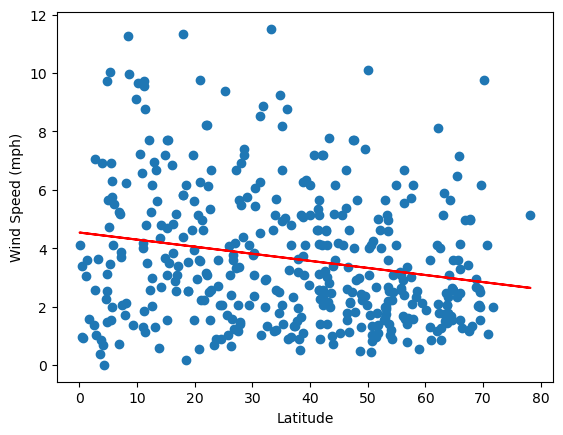

In [64]:
# Northern Hemisphere
xdata = northern_hemi_df['Lat']
ydata = northern_hemi_df['Wind Speed']

xlbl = 'Latitude'
ylbl = 'Wind Speed (mph)'
lblpos = (0,30)

plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,11) 

The r-squared is: -0.3843169167018532


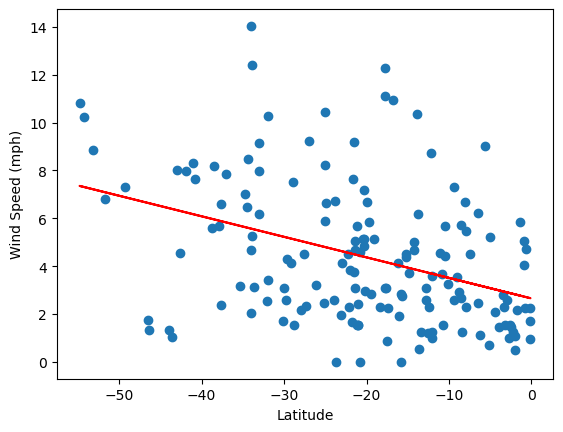

In [65]:
# Southern Hemisphere
xdata = southern_hemi_df['Lat']
ydata = southern_hemi_df['Wind Speed']

xlbl = 'Latitude'
ylbl = 'Wind Speed (mph)'
lblpos = (-50,20)

plotLinearRegression(xdata,ydata,xlbl,ylbl,lblpos,12)

**Discussion about the linear relationship:** There is a minimal correlation between wind speed and latitude in the Southern Hemisphere. As we move further south from the equator, there is a slight increase in wind speed. However, this relationship is not strongly pronounced and no correlation should be considered.

Empty DataFrame
Columns: []
Index: []
